In [301]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
import lightgbm as lgb
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,matthews_corrcoef,f1_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from keras.models import Sequential
from keras.layers import Dense , Dropout
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [302]:
data =pd.read_csv('voice.csv')
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<AxesSubplot:>

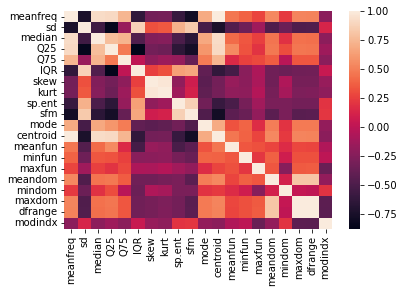

In [303]:
sns.heatmap (data.corr())

In [304]:
x= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [305]:
data.label = [1 if i == "male" else 0 for i in data.label]

In [306]:
data.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [307]:
from sklearn.model_selection import StratifiedKFold
folds= StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [308]:
def get_matrix(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.predict(x_test)

In [309]:
for train_index, test_index in folds.split(x,y):
    x_train,x_test, y_train,y_test = x[train_index],x[test_index],\
                                     y[train_index],y[test_index]

In [310]:

#ANN



 #hist = History()

#model = Sequential()

#model.add(Dense(16, activation='relu',input_dim=20))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(1,activation='sigmoid'))

#model.compile(optimizer="Adam", loss='binary_crossentropy',metrics=['accuracy'])
#model.add(Dense(1000, activation='relu', input_dim = n_cols))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1000, activation='relu'))


#model.add(Dense(2, activation='softmax'))

#model.compile(optimizer='adam', 
           #   loss='binary_crossentropy', 
        #      metrics=['accuracy'])

#model.fit(x_train, y_train,batch_size=10, epochs = 40, validation_split = 0.1, callbacks = [hist])

#model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.1,callbacks=[hist],shuffle=2)
#model.fit(x_train, y_train, batch_size=10, epochs=40, verbose=1)



#MODELS
#model= RandomForestClassifier(n_estimators=70, oob_score = True, n_jobs=1, random_state=101, max_features=None, min_samples_leaf=30)
#model = LogisticRegression()
#model = SVC()
#model = lgb.LGBMClassifier(min_child_weight= 0.1,num_iterations=1000, max_bin = 200,min_split_gain= 0.01,max_depth= 100, num_leaves=110, learning_rate=0.01,verbosity= -1,)
#model = LinearDiscriminantAnalysis()
#model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
#model = SGDClassifier(loss='modified_huber', random_state=101)
#model = GaussianNB()
#model = KNeighborsClassifier(n_neighbors=9)
#model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)





model.fit(x_train, y_train)
y_pred = get_matrix(model, x_train, x_test, y_train, y_test)
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))
print('Precision:',metrics.precision_score(y_test,y_pred,pos_label="female"))
print('MCC:',metrics.matthews_corrcoef(y_test, y_pred))
print('F1 Score:',metrics.f1_score(y_test, y_pred,pos_label="female"))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label="female"))

C:\Users\Rice\anaconda3\envs\keras\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Rice\anaconda3\envs\keras\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Accuracy: 0.9841772151898734
Precision: 0.9872611464968153
MCC: 0.9683738259798885
F1 Score: 0.9841269841269842
Recall: 0.9810126582278481
